# Data collection, Cleaning and Preprocessing

In [420]:
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [421]:
from sklearn.datasets import load_bostondataset = pd.read_csv('loan.csv')
df = dataset.copy()
dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [422]:
dataset.shape

(1460, 81)

In [423]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [424]:
dataset.groupby('SaleCondition').size()

SaleCondition
Abnorml     101
AdjLand       4
Alloca       12
Family       20
Normal     1198
Partial     125
dtype: int64

In [425]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [426]:
dataset.groupby('SaleCondition').size()
y = dataset[['SaleCondition']]

In [427]:
dataset.drop('Id',axis=1,inplace=True)
dataset.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [428]:
cols = [col for col in dataset.columns if dataset[col].dtype == 'int64']
cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [429]:
dataset = dataset.loc[:,cols]
dataset.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [430]:
dataset.dropna(axis=1)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,366,0,112,0,0,0,0,4,2010,142125


In [431]:
dataset.shape

(1460, 34)

In [432]:
y.groupby('SaleCondition').size()

SaleCondition
Abnorml     101
AdjLand       4
Alloca       12
Family       20
Normal     1198
Partial     125
dtype: int64

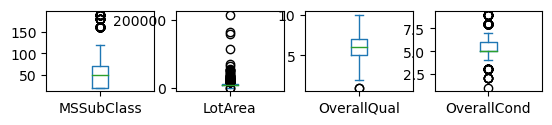

In [433]:
dataset.iloc[:,0:4].plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
pyplot.show()

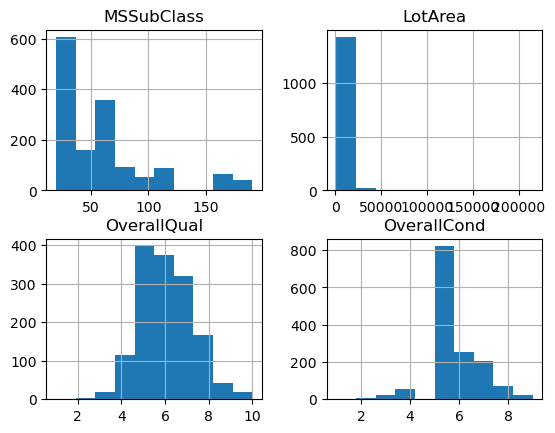

In [434]:
dataset.iloc[:,0:4].hist()
pyplot.show()

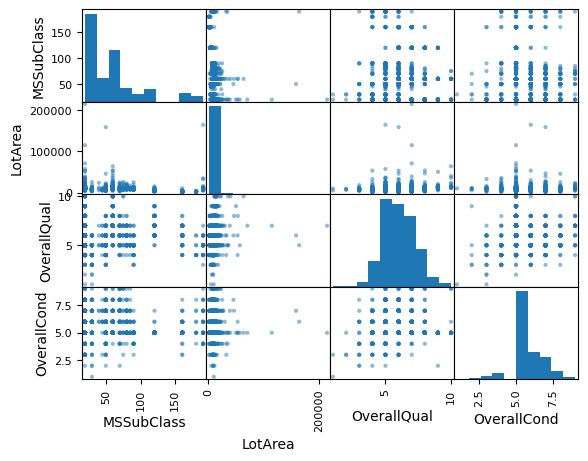

In [435]:
scatter_matrix(dataset.iloc[:,0:4])
pyplot.show()

In [436]:
dataset = dataset.iloc[:,0:4]
dataset.shape

(1460, 4)

## KNN Algorithm

In [437]:
y = y.values

In [438]:
X = dataset.values

In [439]:
validation_size = 0.30
seed = 7
X_train, X_validation, y_train, y_validation = train_test_split(X, y,test_size=validation_size, random_state=seed)

In [440]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
predictions = knn.predict(X_train)

In [441]:
confusion_matrix(y_train, predictions)

array([[  5,   0,   0,   0,  66,   0],
       [  0,   0,   0,   0,   3,   0],
       [  0,   0,   4,   0,   7,   0],
       [  0,   0,   0,   0,  15,   1],
       [  4,   0,   3,   0, 834,   2],
       [  2,   0,   0,   0,  73,   3]], dtype=int64)

In [442]:
print(accuracy_score(y_train, predictions))

0.8277886497064579


In [443]:
def cross_validate(model,X_train,Y_train):
    kfold = KFold(n_splits=10,shuffle = True, random_state=seed)
    scores = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = "accuracy")
    print("Scores:", scores)
    print('Cross validated mean accuracy:', scores.mean())

In [444]:
cross_validate(knn,X_train,y_train)

Scores: [0.83495146 0.7961165  0.85294118 0.7745098  0.84313725 0.85294118
 0.83333333 0.82352941 0.80392157 0.79411765]
Cross validated mean accuracy: 0.8209499333714068


In [445]:
predictions = knn.predict(X_validation)
confusion_matrix(y_validation, predictions)

array([[  1,   0,   0,   0,  29,   0],
       [  0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0,   1,   0],
       [  1,   0,   0,   0,   3,   0],
       [  4,   0,   0,   0, 349,   2],
       [  1,   0,   1,   0,  44,   1]], dtype=int64)

In [446]:
print(accuracy_score(y_validation, predictions))

0.8013698630136986


## Logistic Regression

In [447]:
temp = df['SaleCondition'].value_counts().to_dict()
temp

{'Normal': 1198,
 'Partial': 125,
 'Abnorml': 101,
 'Family': 20,
 'Alloca': 12,
 'AdjLand': 4}

In [448]:
Y = df.loc[:,['SaleCondition']]
Y = pd.DataFrame(Y['SaleCondition'].map(temp),columns=['SaleCondition'])
Y.head()

,SaleCondition
0,1198
1,1198
2,1198
3,101
4,1198


In [449]:
y = Y[['SaleCondition']]

In [450]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X,y,test_size = 0.3, random_state = 7)

In [451]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [452]:
predictions = model.predict(X_train)

In [453]:
confusion_matrix(Y_train, predictions)

array([[  0,   0,   0,   0,   0,   3],
       [  0,   0,   0,   0,   0,  11],
       [  0,   0,   0,   0,   0,  16],
       [  0,   0,   0,   0,   0,  71],
       [  0,   0,   0,   0,   0,  78],
       [  0,   0,   0,   0,   0, 843]], dtype=int64)

In [454]:
accuracy_score(Y_train,predictions)

0.824853228962818

### accuracy of cross validation

In [455]:
cross_validate(model, X_train, Y_train)

Scores: [0.85436893 0.80582524 0.84313725 0.76470588 0.83333333 0.85294118
 0.83333333 0.83333333 0.82352941 0.80392157]
Cross validated mean accuracy: 0.8248429468874928


In [456]:
predictions = model.predict(X_validation)

In [457]:
confusion_matrix(Y_validation,predictions)

array([[  0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   4],
       [  0,   0,   0,   0,   0,  30],
       [  0,   0,   0,   0,   0,  47],
       [  0,   0,   0,   0,   0, 355]], dtype=int64)

In [458]:
accuracy_score(Y_validation,predictions)

0.8105022831050228

## Linear Discriminant Analysis

In [459]:
model = LinearDiscriminantAnalysis()
model.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

In [460]:
predictions = model.predict(X_train)

In [461]:
confusion_matrix(Y_train,predictions)

array([[  0,   0,   0,   0,   0,   3],
       [  0,   0,   0,   0,   0,  11],
       [  0,   0,   0,   0,   0,  16],
       [  0,   0,   0,   0,   0,  71],
       [  0,   0,   0,   0,  10,  68],
       [  1,   1,   0,   0,  16, 825]], dtype=int64)

In [462]:
accuracy_score(Y_train,predictions)

0.8170254403131115

In [463]:
cross_validate(model, X_train, Y_train)

Scores: [0.84466019 0.81553398 0.85294118 0.75490196 0.80392157 0.83333333
 0.84313725 0.83333333 0.81372549 0.7745098 ]
Cross validated mean accuracy: 0.8169998096325909


In [464]:
predictions = model.predict(X_validation)

In [465]:
confusion_matrix(Y_validation,predictions)

array([[  0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   4],
       [  0,   0,   0,   0,   1,  29],
       [  0,   0,   0,   0,   5,  42],
       [  0,   1,   0,   0,   7, 347]], dtype=int64)

In [466]:
accuracy_score(Y_validation,predictions)

0.8036529680365296

## SVM

In [467]:
model = SVC()

In [468]:
model.fit(X_train,Y_train)
predictions=model.predict(X_train)

In [469]:
confusion_matrix(Y_train,predictions)

array([[  0,   0,   0,   0,   0,   3],
       [  0,   0,   0,   0,   0,  11],
       [  0,   0,   0,   0,   0,  16],
       [  0,   0,   0,   0,   0,  71],
       [  0,   0,   0,   0,   0,  78],
       [  0,   0,   0,   0,   0, 843]], dtype=int64)

In [470]:
accuracy_score(Y_train,predictions)

0.824853228962818

In [471]:
predictions = model.predict(X_validation)

In [473]:
confusion_matrix(Y_validation,predictions)

array([[  0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   4],
       [  0,   0,   0,   0,   0,  30],
       [  0,   0,   0,   0,   0,  47],
       [  0,   0,   0,   0,   0, 355]], dtype=int64)

In [474]:
accuracy_score(Y_validation,predictions)

0.8105022831050228

## Naive Bayes Classifier

In [475]:
model = GaussianNB()

In [476]:
model.fit(X_train,y_train)

GaussianNB()

In [477]:
predictions = model.predict(X_train)

In [478]:
confusion_matrix(y_train,predictions)

array([[  0,   0,   0,   0,  70,   1],
       [  0,   0,   0,   0,   3,   0],
       [  0,   0,   0,   0,  11,   0],
       [  0,   0,   0,   0,  16,   0],
       [  1,   0,   0,   0, 791,  51],
       [  0,   0,   0,   0,  49,  29]], dtype=int64)

In [479]:
accuracy_score(y_train,predictions)

0.8023483365949119

In [224]:
predictions = model.predict(X_validation)

In [225]:
confusion_matrix(y_validation,predictions)

array([[  0,   0,   0,   0,  28,   2],
       [  0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0,   4,   0],
       [  0,   0,   0,   0, 332,  23],
       [  0,   0,   0,   0,  28,  19]], dtype=int64)

In [226]:
accuracy_score(y_validation,predictions)

0.8013698630136986

## Principal Component Analysis

In [227]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
target_dataset = df.loc[:,[col for col in df.columns if df[col].dtype=='int64']]
print("Initial Shape : " , target_dataset.shape)
scaler = StandardScaler()
scaler.fit(target_dataset)
scaled_data = scaler.fit_transform(target_dataset)
principal = PCA(n_components = 3)
principal.fit(scaled_data)
dimensionReduced_data = principal.fit_transform(scaled_data)
print("Final Shape : " , dimensionReduced_data.shape)

Initial Shape :  (1460, 35)
Final Shape :  (1460, 3)


In [228]:
principal.components_

array([[-0.00147987, -0.01479149,  0.11124649,  0.30452157, -0.06946681,
         0.22176389,  0.20385729,  0.14103364, -0.00805235,  0.11355922,
         0.25804164,  0.25849619,  0.14267727, -0.00861078,  0.30790009,
         0.07654105, -0.01128414,  0.26061237,  0.12746986,  0.11661244,
        -0.01846649,  0.24782422,  0.19312498,  0.27949149,  0.27335488,
         0.13542615,  0.15062855, -0.06628971,  0.01569318,  0.0371931 ,
         0.05106111, -0.00957631,  0.02418696, -0.01483848,  0.33378817],
       [ 0.01730722,  0.18558727, -0.06337365, -0.02090885,  0.0422455 ,
        -0.16576854, -0.06542011, -0.32045937, -0.08817715,  0.12449028,
        -0.24020096, -0.19071697,  0.43032722,  0.11371109,  0.22769681,
        -0.31049681, -0.00406069,  0.15565702,  0.23055495,  0.34664608,
         0.17242519,  0.30710091, -0.02084107, -0.06868619, -0.10609606,
        -0.07703611,  0.03498942,  0.10015605, -0.03113014, -0.00086005,
        -0.00149414,  0.02334123,  0.02676478, -0.

In [229]:
print(principal.explained_variance_ratio_)

[0.20484532 0.09042009 0.06139631]
